In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.applications import ResNet50V2
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [3]:
# Veri yolu
DATADIR = "/content/drive/MyDrive/DerinOgrenme/RetinalImaging/Eyes/"
CATEGORIES = ["Cataract", "Diabetic Retinopathy", "Glaucoma", "Normal"]
IMG_SIZE = 50


# Tüm veriyi depolamak için liste
all_data = []

In [4]:
# Tüm veriyi alma fonksiyonu
def create_all_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
            except Exception as e:
                pass

In [5]:
# Tüm veriyi oluşturma
create_all_data()

# Giriş ve çıkış verilerini ayırma
X = []
y = []
for features, label in all_data:
    X.append(features)
    y.append(label)

In [6]:
# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
from tensorflow.keras.applications import ResNet50

res = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)


94765736/94765736 [==============================] - 5s 0us/step


In [9]:
# Eğitim, test ve doğrulama setleri için özellik çıkartma
train_features = res.predict(np.array(x_train))
test_features = res.predict(np.array(x_test))

27/27 [==============================] - 1s 38ms/step


In [10]:
# Özellik vektörlerini düzleştirme
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

In [11]:
# SVM için veri hazırlama
svm_model = SVC(kernel='linear', C=1.0,probability=True, random_state=42)

In [12]:
# SVM modelini eğitme
svm_model.fit(train_features_flatten, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [13]:
# Test verisi üzerinde sınıflandırma yapma
svm_predictions = svm_model.predict(test_features_flatten)

In [14]:
# Model performansını değerlendirme
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model Doğruluğu:", svm_accuracy)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, svm_predictions))

SVM Model Doğruluğu: 0.8507109004739336
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       233
           1       0.98      0.96      0.97       224
           2       0.75      0.76      0.75       188
           3       0.78      0.79      0.79       199

    accuracy                           0.85       844
   macro avg       0.85      0.85      0.85       844
weighted avg       0.85      0.85      0.85       844



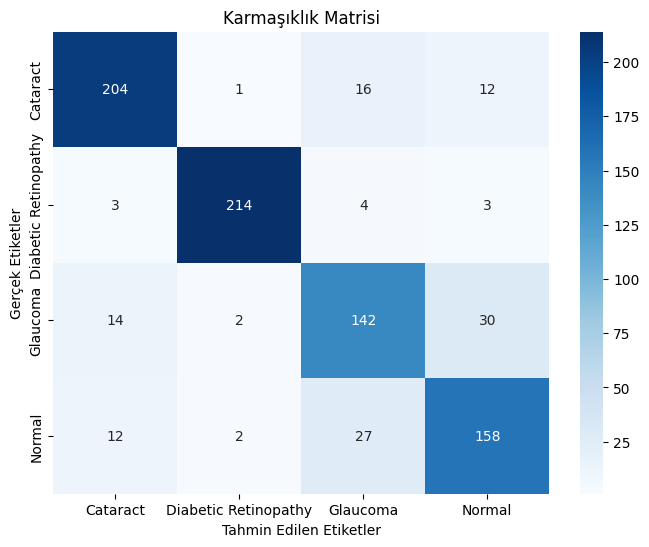

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Karmaşıklık Matrisi (Confusion Matrix) görselleştirmesi
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Tahmin Edilen Etiketler')
    plt.ylabel('Gerçek Etiketler')
    plt.title('Karmaşıklık Matrisi')
    plt.show()

# Karmaşıklık Matrisi görselleştirmesi
plot_confusion_matrix(y_test, svm_predictions, CATEGORIES)


In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False, #whether to include the fully-connected layer at the top of the network.
    weights="imagenet", #one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.
    #input_tensor=None, #optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
    #input_shape=None, #optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with "channels_last" data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
    #pooling=None, #Optional pooling mode for feature extraction when include_top is False.
                   #None means that the output of the model will be the 4D tensor output of the last convolutional block.
                   #avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
                   #max means that global max pooling will be applied.
    #classes=1000, #optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.
    #classifier_activation="softmax", #A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".
)